## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# sum converted divided by the df rows
p = df['converted'].sum() / df.shape[0]
p

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# n for new , t dor treatment
n_and_t=df.shape[0] - (df[(df['group'] == 'treatment')==(df['landing_page']== 'new_page')].shape[0])
n_and_t 

3893

f. Do any of the rows have missing values?

In [7]:
 miss_values = df.isna().sum()
miss_values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
d1=df[(df['group']== 'treatment') & (df['landing_page'] == 'new_page')]
a2=df[(df['group']== 'control') & (df['landing_page'] == 'old_page')]
t = a2.append(d1)
df2 =t.sort_index()
df2

C:\Users\mass\AppData\Local\Temp\ipykernel_9744\1978956633.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = a2.append(d1)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# is there any duplicated in user_id
df2[df2['user_id'].duplicated()].user_id.count()

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#info for duplicated 
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
d= df2[df2['user_id'].duplicated()]
d

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(d.index , inplace = True)

In [14]:
# check is there any duplicated value in df2
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# p --> probability ,c --> converted
p_c=df2[df2['converted'] == 1].shape[0] / df2.shape[0]
p_c

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#we should calculate p(ct|cv) ct for control and cv for converted
p_control =df2[(df2['converted'] == 1) & (df2['group'] == "control")].shape[0] / df2[df2["group"] == "control"].shape[0]

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_treatment=df2[(df2['converted'] == 1) & (df2['group'] == "treatment")].shape[0] / df2[df2["group"] == "treatment"].shape[0]

d. What is the probability that an individual received the new page?

In [18]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [19]:
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

In [20]:
1- 0.5067003000853454

0.4932996999146546

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions 

**Your answer goes here.**

### my answer is : 
**not for now , we can't say that we don't have the sufficient evidence we should know the rate for convert for new treatment page and use AB test to  make sure but rely on the above the half of users with  new treatment page leads to more conversions , 12,04% is recieved the old_page were converted and 11,88% were recieved the new page were converted.we can recognize that 
the new page didn't increase the conversion rate.**

# <a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**$H{0}$:convrted user from p-old_page => p_new_page**

**$H{1}$:convrted user from p-old_page < p_new_page**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

# the rate convert  of new page or old page don't diffrent of the probability in above in H0 in hypothesis test 

a. What is the **convert rate** for $p_{new}$ under the null? 

the mean for scoend population

In [21]:
# clacuolate the P_new (mean) for converted of landing page 
p_new = df2['converted'].mean() 
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

the mean for scoend population

In [22]:
# clacuolate the P_old(mean) for converted of landing page
p_old = df2['converted'].mean() 
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
# claculated the len for n{new}
#the number of first population
nnew =df2.query(" landing_page == 'new_page'")
len(nnew)

145310

d. What is $n_{old}$?

In [24]:
#get number for socend population
nold =df2.query(" landing_page == 'old_page'")
len(nold)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# simulate asample for new_page by binomial methode
# get arandom sample from first population
new_page_converted = np.random.binomial(1,p_new,len(nnew))
new_page_converted.mean()

0.11911774826233569

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# simulate asample for old_page by binomial methode 
#get arandom sample from first population
old_page_converted = np.random.binomial(1,p_old,len(nold))
old_page_converted.mean()

0.11971171716893594

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#calculate differance between propotion(mean) for random 
#two sample that's why the are change every time 
#pn --> pnew  for converted new page
#po --> pold  for converted old page
po = old_page_converted .mean()
pn = new_page_converted.mean()
pn - po

-0.0005939689066002535

In [28]:
# other way to be calculate the propotion to be sure
diffrence_of_means_sample = (new_page_converted.sum()/len(nnew))-(old_page_converted.sum()/len(nold))
diffrence_of_means_sample

-0.0005939689066002535

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# calculate the differance between propotion for sampel1(p{new}) , sample2(p{old}) 10000 times

p_diffs = []

new_page_converted = np.random.binomial(len(nnew),p_new,10000)/len(nnew)
old_page_converted =np.random.binomial(len(nold),p_old,10000)/len(nold)
p_diffs = new_page_converted- old_page_converted


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

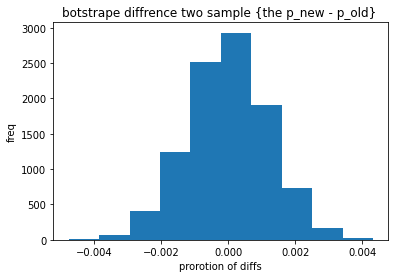

In [30]:
plt.hist(p_diffs);
plt.xlabel("prorotion of diffs")
plt.ylabel ("freq")
plt.title("botstrape diffrence two sample {the p_new - p_old} ");

In [31]:
import seaborn as sns

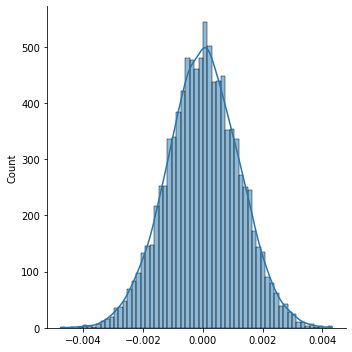

In [32]:
# the onther way to represent my p_diffs as curve
sns.displot(data = p_diffs,kde = True);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
p_diffs.mean()

4.657539668464018e-06

In [34]:
# to get difference observed we get mean for every group of user (page ) converted to 
#new_page or old_page
df_treat = df2.query("landing_page == 'new_page'")
df_con = df2.query("landing_page == 'old_page'")
diff_obs = df_treat['converted'].mean()-df_con['converted'].mean()
diff_obs


-0.0015782389853555567

In [35]:
# clculate the mean for greater value in {p_diffs} than value in {diff_obs}
t = 0
f = 0
for i in (p_diffs > diff_obs ):
    if i == True :
        t +=1
    else:
        f +=1 
print("t",t)
print("f",f)
t_m = t/(f+t)
print("the mean for which value is greater(p_value) : " ,t_m )

t 9061
f 939
the mean for which value is greater(p_value) :  0.9061


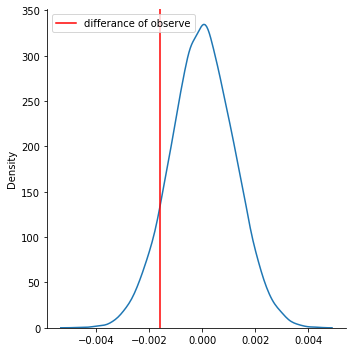

In [36]:
# show the differance of observe and represent it as line 
sns.displot(p_diffs,kind = "kde");
plt.axvline(x = diff_obs , color = "r" , label='differance of observe');
plt.legend()
plt.show();

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

**we can say about 90% of p_diffs is greater than diff_obs so we can say** 
**the new_page doesn't have higher rate of converted and in the same time we don't have sufficoent evidence to reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm
# prepare the first popultion
convert_old =df.query("landing_page == 'old_page' & converted== 1")
# prepare the socend populotion
convert_new =df.query("landing_page == 'new_page' & converted== 1")
# get the number or both of populotions
old = df2.query("landing_page == 'old_page'")
new= df2.query("landing_page == 'new_page'")
n_old =len(old) 
n_new =len(new)  

In [38]:
# number for all populotion and numer for converted user from this populoion
print(f"number for converted user is {len(convert_old)}")
print("from populotion num is { n_old}")

number for converted user is 17739
from populotion num is { n_old}


In [39]:
print(f"number for converted user is {len(convert_new)}")
print(f"from populotion num is { n_new}")

number for converted user is 17498
from populotion num is 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
# calculate the z_value and p_value to cheak which hypothesis should we choose  
z_value , p_value =sm.stats.proportions_ztest([len(convert_old),len(convert_new)],[n_old,n_new],value = None ,alternative="smaller",prop_var=False)
print("z_value is ",z_value)
print("the p_value is ",p_value)

z_value is  1.394390551291367
the p_value is  0.9184001500898661


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**after we compute p_value ,z_value we can SAY DON'T reject the null hypothesis which is say p_old is greater than or equile the p_new
and p_value is 91.5% that mean we can't say the new page has higher converted rate than old page** 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 **my answer is:**
             **dependence on the previes studies we want answer as (yes or no) yes to use                     new_page or no     to use it so we will use logistic regression** 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
#first we make two columns  for  dummies variable is (treatment , control) 
df2[['control','treatment']] = pd.get_dummies(df2["group"])
# now add interspect columns
df2['interspect'] = 1

# we need to choose one of columns  so we will remove control
df2 = df2.drop('control',axis = 1)
 # we  need to name dummy columns to ab_page
df2.rename(columns={"treatment":"ab_page"},inplace = True)  

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,interspect
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
# creat logistic model
model =sm.Logit(df2['converted'],df2[['interspect','ab_page']])
fit = model.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
# know creat a summary for above model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        12:33:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interspect    -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**answer : p_value in logistic regression is(0.190) diffrent the value we get from hypothesis test is (0.914) 
for regression the null  : b = 0 and  alternative : b != 0
so here we will reject null and choose alternative 
but the the hypothesis test is depended on the rate(propotion) of population so that will be different and the assume onetail test couse we want to know which page has agreater rate for conversion but regression we want to know (convert or not ) that is two tailtest so that is the diffrent between them**




**converted rate old rate is greater than new rate is  one tail test but we do in regression (not_convert , convert ) is two tail test**

# why the p_value in part 3 different from part 2 ?
**the p_value diffrent the p_value in part2 becouse the test of regression assume  an (intercept , difference in one or two_talied testing**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**answer is :**

**the factor that was change coff is the age of user (old , kid ,teenager )
and the socend factor will be the gender of user (female,male)
but if we but more factor that will impact the will reduce the quality of our model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,interspect
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1


In [54]:
# first see what is the dummy variable in country columns to creat it 
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [55]:
### Create the necessary dummy variables
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
# add the interspact columns
df_new['interspect'] = 1
#
df_new.head(3)

,country,timestamp,group,landing_page,converted,ab_page,interspect,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0


In [56]:
### Fit Your Linear Model And Obtain the Results
# creat model
model2 = sm.Logit(df_new['converted'],df_new[['interspect','ab_page','CA','US']])
# fit model
fit2 = model2.fit()
fit2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:               2.323e-05
Time:                        15:41:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interspect    -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
US            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
# know i will add anew cloumns to see inter action between both country ab_page 
# make columns relation between us country and ab_page
df_new['abpage_us'] = df_new.US * df_new.ab_page
# make columns relation between Ca country and ab_page
df_new['abpage_ca'] = df_new.CA * df_new.ab_page
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,interspect,US,UK,CA,abpage_us,abpage_ca
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1


In [49]:
# make our model to fit it 
model3 = sm.Logit(df_new['converted'],df_new[['interspect','ab_page','US','CA','abpage_us' ,'abpage_ca']])
fit3 = model3.fit()
fit3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:               3.482e-05
Time:                        12:33:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interspect    -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US            -0.0118      0.040     -0.296      0.767      -0.090       0.066
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
abpage_us     -0.0783      0.057     -1.378      0.168      -0.190       0.033
abpage_ca     -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

# summary of regression

that mean the country   p_value greater than (0.5)that mean landing page in (CA,US)dosen't impact to be in this country or any onther country don't make any impact

<a id='conclusions'></a>
## Conclusions

after all this studies statistics (probablity , hypothesis , regression )we can say 
new_page doesn't maKE converted user  more than the old_page

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.